In [1]:
import data_handler, numpy as np
from MultiLayerNeuralNetwork import MultiLayerNeuralNetwork
import matplotlib.pyplot as plt
from tqdm import tqdm

### Load data

In [ ]:
train, val, test = data_handler.load_data(5, 5000)

In [3]:
train_X = train[0]
train_Y = train[1] # One hot encoding
train_y = train[2] # labels

val_X = val[0]
val_Y = val[1] # One hot encoding
val_y = val[2] # labels

test_X = test[0]
test_Y = test[1] # One hot encoding
test_y = test[2] # labels

### Check gradients

In [4]:
C = np.max(train_y).astype(int) + 1
d = 20
lamb = 0.1
mnn = MultiLayerNeuralNetwork([50], C, d, lamb)

a_W, a_b, n_W, n_b = mnn.check_grad(train_X[:20, :5], train_Y[:20, :5], 1e-8)

def is_close(a, n, eps):
    return np.sum(np.abs(a - n) / np.maximum(np.ones(a.shape) * eps, np.abs(a) + np.abs(n)))

print(is_close(a_W[0], n_W[0], 1e-8))
print(is_close(a_W[1], n_W[1], 1e-8))
print(is_close(a_b[0], n_b[0], 1e-8))
print(is_close(a_b[1], n_b[1], 1e-8))

0.0035130679516149825
0.001790646900807835
0.0007427408073201421
7.956251213685934e-07


### Initialize the network

In [5]:
C = np.max(train_y).astype(int) + 1
d = train_X.shape[0]
lamb = 1.75e-5
mnn = MultiLayerNeuralNetwork([290], C, d, lamb)

### Test the cyclic scheme

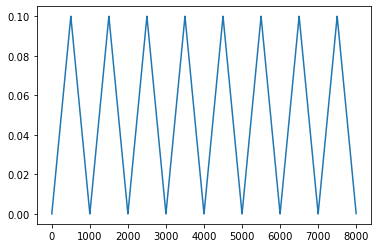

In [6]:
mnn.set_cyclic_scheme(1e-5, 1e-1, 500)
eta = []
for i in range(8000):
    mnn.cyclic_update()
    eta.append(mnn.eta)
plt.plot(eta)
plt.show()

In [7]:
lamb = 1.744601263622717e-05 # searched for this
hidden_nodes = 290 # searched for this
C = np.max(train_y).astype(int) + 1
d = train_X.shape[0]
mnn = MultiLayerNeuralNetwork([hidden_nodes], C, d, lamb)

# Set hyperparameters for cyclic learning rate scheme
eta_min = 1e-5
eta_max = 1e-1
batch_size = 100
n_s = 2 * (train_X.shape[1] // batch_size)
epochs_one_cycle = (n_s * 2) // (train_X.shape[1] // batch_size)
number_cycles = 2
epochs = int(epochs_one_cycle*number_cycles)

mnn.set_cyclic_scheme(eta_min, eta_max, n_s)
mnn.fit([train_X, train_Y, train_y], [val_X, val_Y, val_y], batch_size=batch_size, epochs=epochs, augment=True)

acc = mnn.compute_accuracy(val_X, val_y)
print("Validation accuracy",  str(acc)[:9])

Epoch: 7, val_acc: 0.5198: 100%|█████████████████████████████████████████████████████████| 8/8 [04:08<00:00, 31.05s/it]


Validation accuracy 0.561


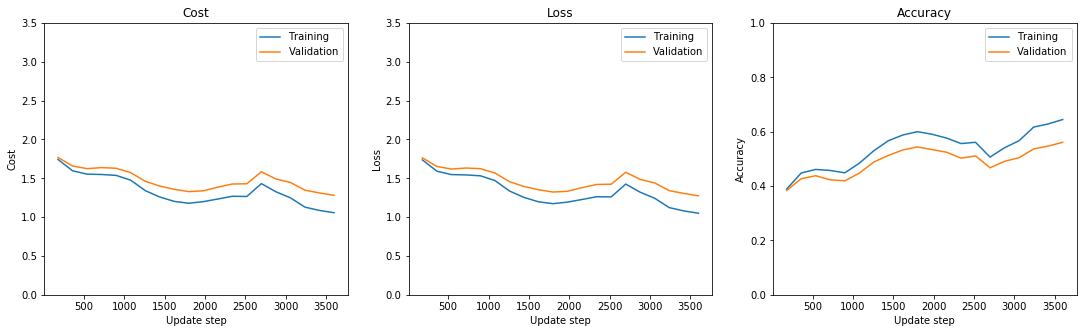

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(18.5, 5)
ax1.plot(mnn.time_steps, mnn.train_cost)
ax1.plot(mnn.time_steps, mnn.val_cost)
ax1.set_ylim(0, 3.5)
ax1.legend(["Training", "Validation"])
ax1.set_title("Cost")
ax1.set_xlabel("Update step")
ax1.set_ylabel("Cost")
ax2.plot(mnn.time_steps, mnn.train_loss)
ax2.plot(mnn.time_steps, mnn.val_loss)
ax2.set_ylim(0, 3.5)
ax2.legend(["Training", "Validation"])
ax2.set_title("Loss")
ax2.set_xlabel("Update step")
ax2.set_ylabel("Loss")
ax3.plot(mnn.time_steps, mnn.train_acc)
ax3.plot(mnn.time_steps, mnn.val_acc)
ax3.set_ylim(0, 1)
ax3.legend(["Training", "Validation"])
ax3.set_xlabel("Update step")
ax3.set_ylabel("Accuracy")
ax3.set_title("Accuracy")
plt.savefig("finalbonus", transparent=True)